In [1]:
# 3 Trends

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import seaborn as sb
import tweepy
import numpy as np

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import access_token, consumer_key, consumer_secret, access_token_secret 

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of BBC 
# Target Account BBC 
bbc_target_user = "@BBCNews"

# Counter
counter = 1

# Variables for holding sentiments
bbc_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(bbc_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        bbc_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1


In [5]:
# Convert sentiments to DataFrame
bbc_sentiments_df = pd.DataFrame(bbc_sentiments)
bbc_sentiments_df.head()
# Could convert date using date time library

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Fri Mar 30 00:31:09 +0000 2018,1.000,0.000,0.0,1
1,-0.4215,Thu Mar 29 23:15:57 +0000 2018,0.714,0.286,0.0,2
2,0.0000,Thu Mar 29 23:11:05 +0000 2018,1.000,0.000,0.0,3
3,-0.7096,Thu Mar 29 21:57:31 +0000 2018,0.670,0.330,0.0,4
4,-0.3818,Thu Mar 29 21:53:27 +0000 2018,0.833,0.167,0.0,5


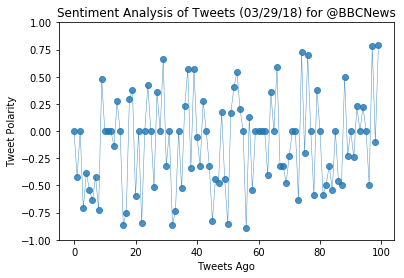

In [6]:
# Create plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment, and +1 the most positive sentiment
# Each plot point will reflect the compound sentiment of a tweet
# Sort each plot point by its relative timestamp
plt.plot(np.arange(len(bbc_sentiments_df["Compound"])),
         bbc_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), bbc_target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [7]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of CBS New York Times
# Target Account
cbs_target_user = "@CBSNews"

# Counter
counter = 1

# Variables for holding sentiments
cbs_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(cbs_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        cbs_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [8]:
# Convert sentiments to DataFrame
cbs_sentiments_df = pd.DataFrame(cbs_sentiments)
cbs_sentiments_df.head()
# Could convert date using date time library

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.3400,Fri Mar 30 00:45:01 +0000 2018,0.888,0.112,0.000,1
1,-0.2500,Fri Mar 30 00:25:01 +0000 2018,0.905,0.095,0.000,2
2,-0.4767,Fri Mar 30 00:05:01 +0000 2018,0.779,0.156,0.065,3
3,-0.5106,Thu Mar 29 23:55:01 +0000 2018,0.864,0.136,0.000,4
4,-0.5574,Thu Mar 29 23:35:01 +0000 2018,0.833,0.167,0.000,5


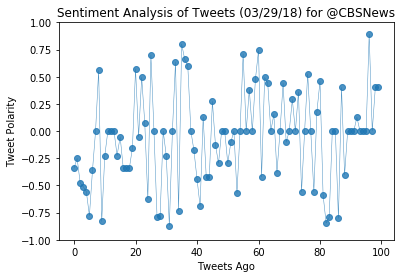

In [9]:

#sb.pairplot(cbs_sentiments_df, palette=palette, x_vars="Tweets Ago", y_vars="Compound", kind='scatter', size=5, aspect=2)
#pairplot.set(ylim=(15,45))
plt.ylim(-1,1)
#plt.xlim(,)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), cbs_target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.plot(np.arange(len(cbs_sentiments_df["Compound"])),
         cbs_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)


#sb.regplot(x=cbs_sentiments_df["Tweets Ago"], y=cbs_sentiments_df["Compound"], fit_reg=False, scatter=True)

plt.show()

In [10]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of CNN
# Target Account
cnn_target_user = "@CNN"

# Counter
counter = 1

# Variables for holding sentiments
cnn_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(cnn_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        cbs_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [11]:
# Convert sentiments to DataFrame
cnn_sentiments_df = pd.DataFrame(cnn_sentiments)
cnn_sentiments_df.head()


""


In [12]:
#change palette 
#palette = ["Gold", "#87cefa", "#f08080"]
#sb.pairplot(cbs_sentiments_df, palette=palette, x_vars="Tweets Ago", y_vars="Compound", kind='scatter', size=5, aspect=2)
#pairplot.set(ylim=(15,45))
plt.ylim(-1,1)
#plt.xlim(,)
#plt.title("")
#plt.xlabel("")
#plt.ylabel("")
#sb.set_style("darkgrid")
plt.plot(np.arange(len(cnn_sentiments_df["Compound"])),
         cnn_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)


#sb.regplot(x=cbs_sentiments_df["Tweets Ago"], y=cbs_sentiments_df["Compound"], fit_reg=False, scatter=True)

plt.show()

KeyError: 'Compound'

In [13]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of Fox News
# Target Account
fox_target_user = "@FoxNews"

# Counter
counter = 1

# Variables for holding sentiments
fox_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(fox_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        fox_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1


In [14]:
# Convert sentiments to DataFrame
fox_sentiments_df = pd.DataFrame(fox_sentiments)
fox_sentiments_df.head()
# Could convert date using date time library

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Fri Mar 30 00:37:30 +0000 2018,1.000,0.000,0.0,1
1,0.0000,Fri Mar 30 00:30:40 +0000 2018,1.000,0.000,0.0,2
2,-0.8316,Fri Mar 30 00:25:19 +0000 2018,0.556,0.444,0.0,3
3,0.0000,Fri Mar 30 00:19:49 +0000 2018,1.000,0.000,0.0,4
4,-0.2960,Fri Mar 30 00:10:49 +0000 2018,0.891,0.109,0.0,5


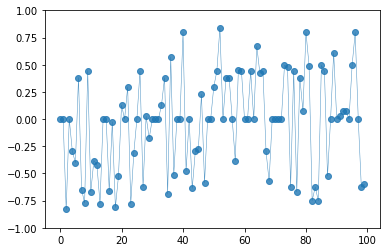

In [15]:
# Fox Plot
plt.ylim(-1,1)
#plt.xlim(,)
#plt.title("")
#plt.xlabel("")
#plt.ylabel("")

plt.plot(np.arange(len(fox_sentiments_df["Compound"])),
         fox_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

plt.show()

In [ ]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of New York Times